# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization
from sklearn.cluster import KMeans # for clustering

import warnings
warnings.filterwarnings('ignore') # to ignore all of the warnings when run the code

# Import Dataset

In [2]:
mall = pd.read_csv('/Users/salsabilafcr/Documents/DATA ANALYTICS/Projects/Python Project/Data/Mall_Customers.csv')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [3]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


From the results of the descriptive statistics above, we know that this dataset is normally distributed, because it has a mean and median value that is significantly different. For that, let's look at it using the following visualization.

In [4]:
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

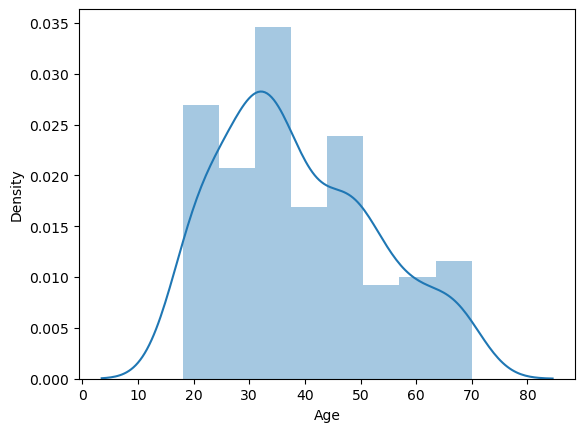

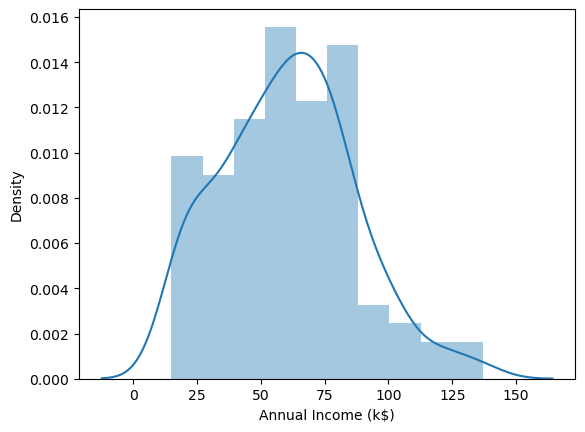

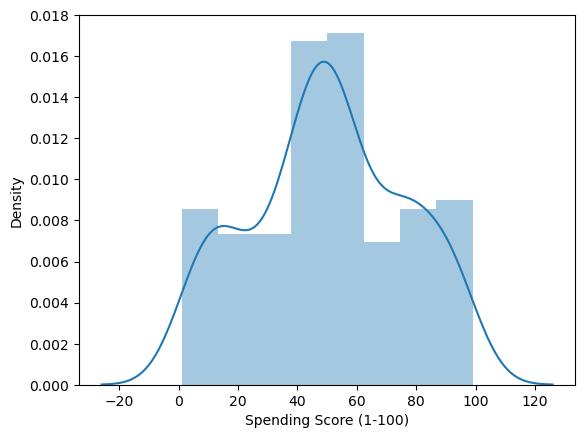

In [5]:
# data distribution
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(mall[i])

We will make it into a more interesting visualization using kdeplot by only looking directly at the KDE values without using a histogram.

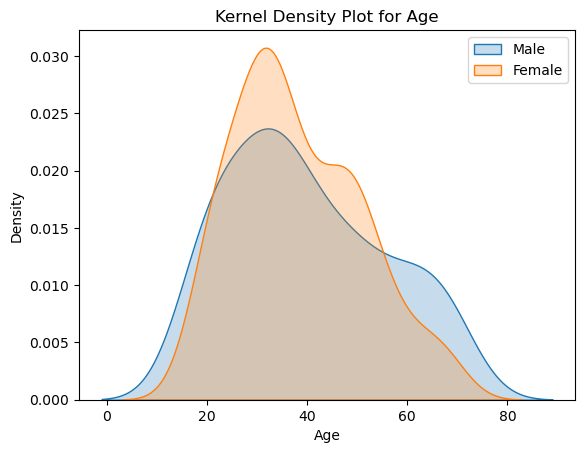

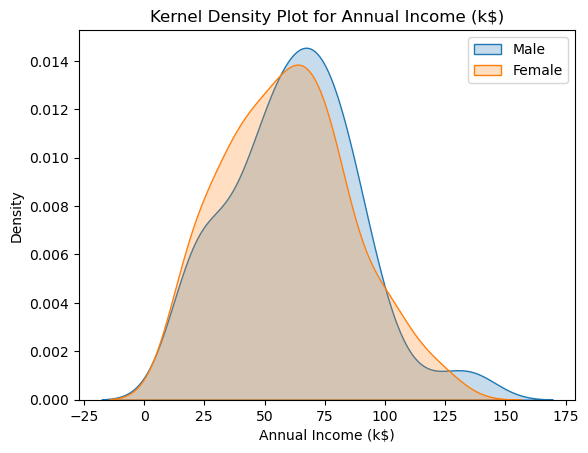

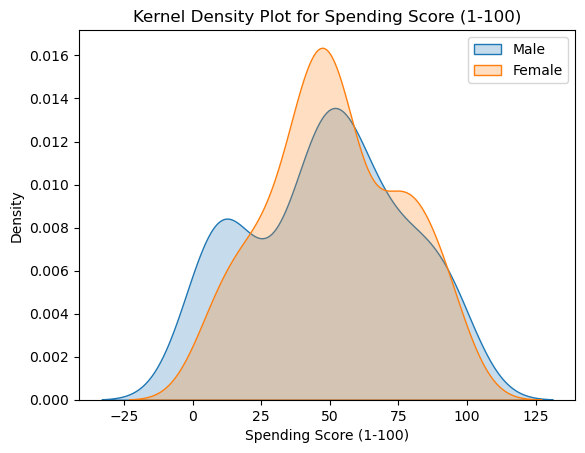

In [6]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    for gender in mall['Gender'].unique():
        sns.kdeplot(mall[mall['Gender'] == gender][i], shade=True, label=gender)
    plt.title(f'Kernel Density Plot for {i}')
    plt.legend()
    plt.show()

From the univariate distribution visualization results of each feature for each gender. We can see how the distributions of age, annual income, and spending scores vary between males and females are normally distributed. However, if we look more carefully for the KDP 'Annual Income (k$)' in the male gender the graph looks a little skewed meaning there are outliers on the graph. 

Let's take a deeper look using boxplots.

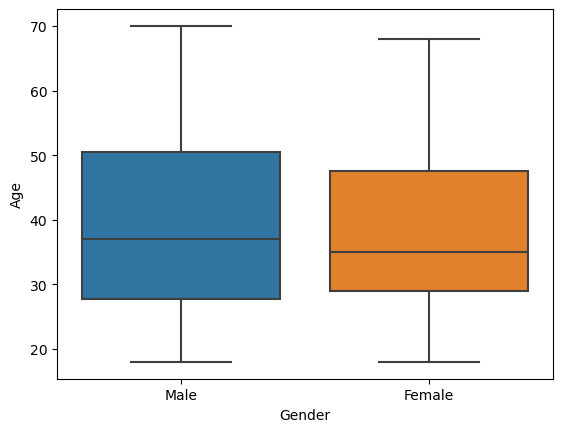

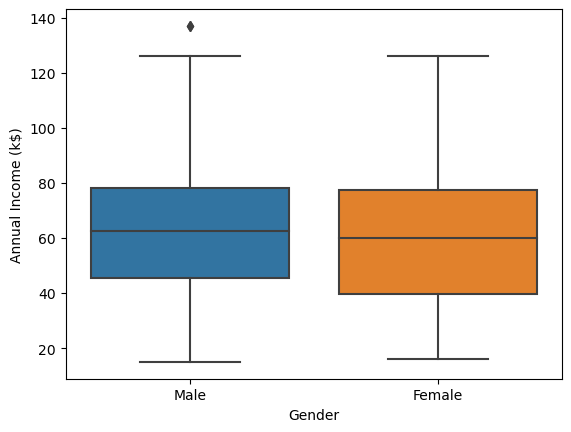

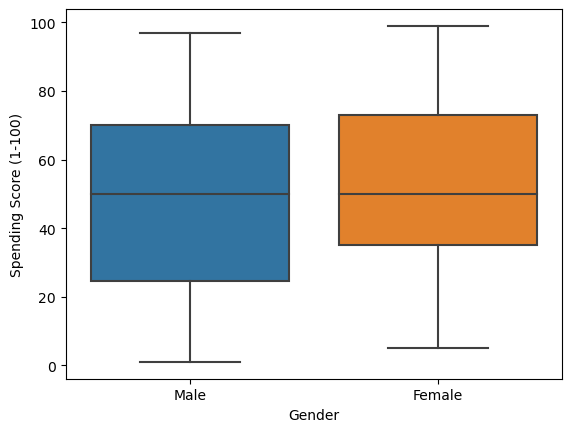

In [7]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=mall,x='Gender',y=mall[i])

Using the boxplot we can find out information about the distribution of the data, the median, and the presence of deeper outliers in each gender group. So just like using distplot or kdeplot above, with boxplot we can see outliers more clearly in 'Annual Income (k$)' for male gender.

In [8]:
mall['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate

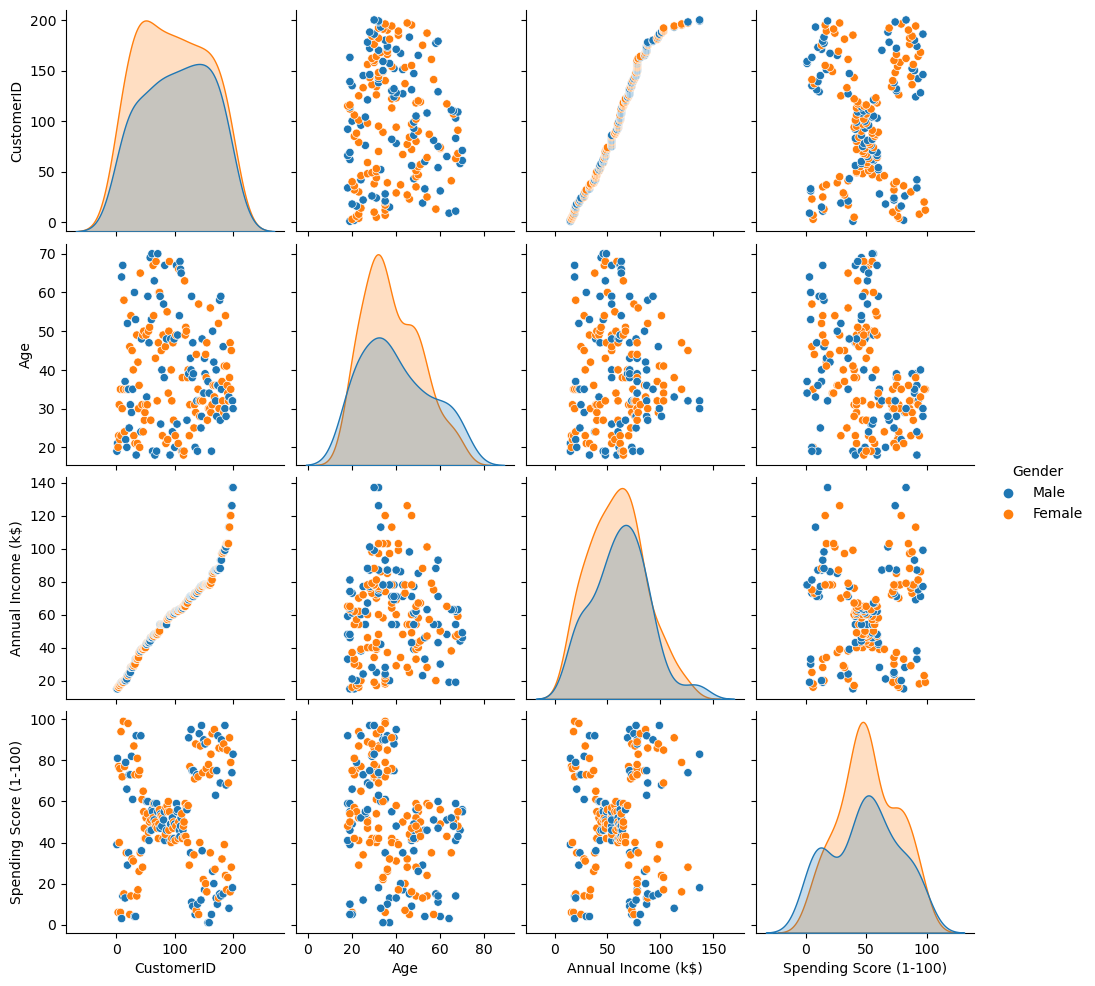

In [9]:
#mall=mall.drop('CustomerID',axis=1)
sns.pairplot(mall,hue='Gender')

If we observe the distribution of data using pairplot, we can immediately see some clusters formed between the variables 'Annual Income (k$)' and 'Spending Score (1-100)'. Since this visual result may be subjective and does not necessarily indicate the existence of actual clusters we still need to perform a clustering method to validate it. 

## Correlation Between Variables

In [10]:
numeric_columns = mall.select_dtypes(include=['float64', 'int64']).columns
mall_numeric = mall[numeric_columns]
correlation_matrix = mall_numeric.corr()

In [11]:
correlation_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

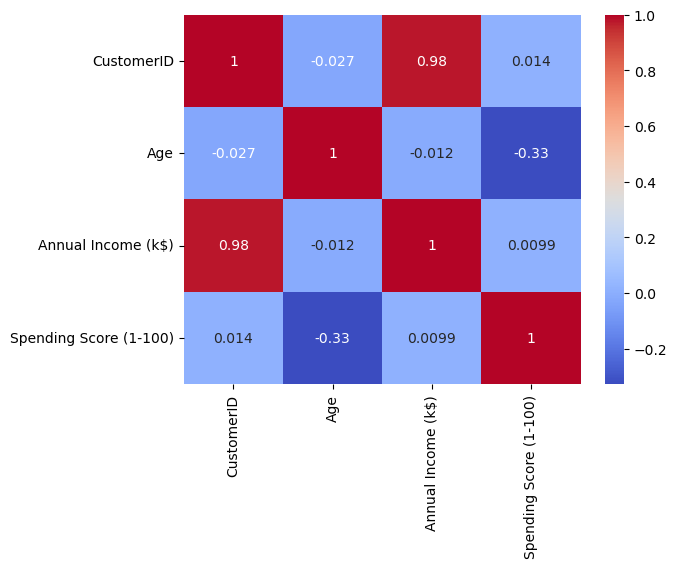

In [12]:
sns.heatmap(mall_numeric.corr(),annot=True,cmap='coolwarm')

From the heatmap, we can see how the variables correlate with each other. It is important to remember that correlation does not imply a causal relationship. While two variables can have a high correlation, this does not mean that a change in one variable causes a change in the other. Correlation only measures statistical relationships.

# KMeans Clustering

## Clustering - Univariate

In [13]:
clustering1 = KMeans(n_clusters=3)

In [14]:
clustering1.fit(mall[['Annual Income (k$)']])

KMeans(n_clusters=3)

I used the column 'Annual Income (k$)' as a variable. Then, fit the KMeans model to the data. The model will try to group the data based on the 'Annual Income (k$)' value into clusters which will be determined using the elbow method.

In [15]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

After the KMeans model is trained on the data, each observation in the dataset will be assigned a cluster label based on the clusters that have been formed.

In [16]:
mall['Income Cluster'] = clustering1.labels_
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [17]:
mall['Income Cluster'].value_counts()

Income Cluster
2    92
0    72
1    36
Name: count, dtype: int64

After labeling the clusters, we can find out how many observations belong to each cluster. We can see that more customers are in cluster 0, followed by cluster 1 and the least in cluster 2.

In [18]:
clustering1.inertia_

23528.152173913044

In [19]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(mall[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [20]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23528.152173913044,
 13278.112713472485,
 8481.496190476191,
 5050.9047619047615,
 3941.4163614163613,
 2822.4996947496948,
 2168.4787157287155,
 1743.4772727272725]

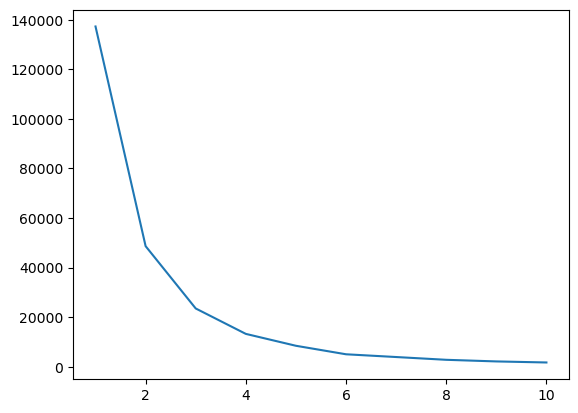

In [21]:
# elbow method
plt.plot(range(1,11),inertia_scores)

From the elbow method results, I determined the value of 3 as the elbow point that will be used in determining the number of clusters.

In [22]:
mall.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 
                               'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.930556,33.027778,50.166667
1,37.833333,99.888889,50.638889
2,39.184783,66.717391,50.054348


From the clustering results using the kmeans method, we can group customers into 3 clusters based on their annual income value. 

## Clustering - Bivariate

In [36]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(mall[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=5)

In [37]:
mall['Spending and Income Cluster'] = clustering2.labels_
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,2


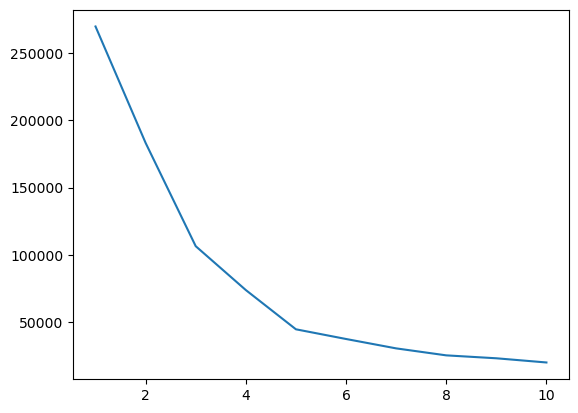

In [38]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(mall[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [48]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

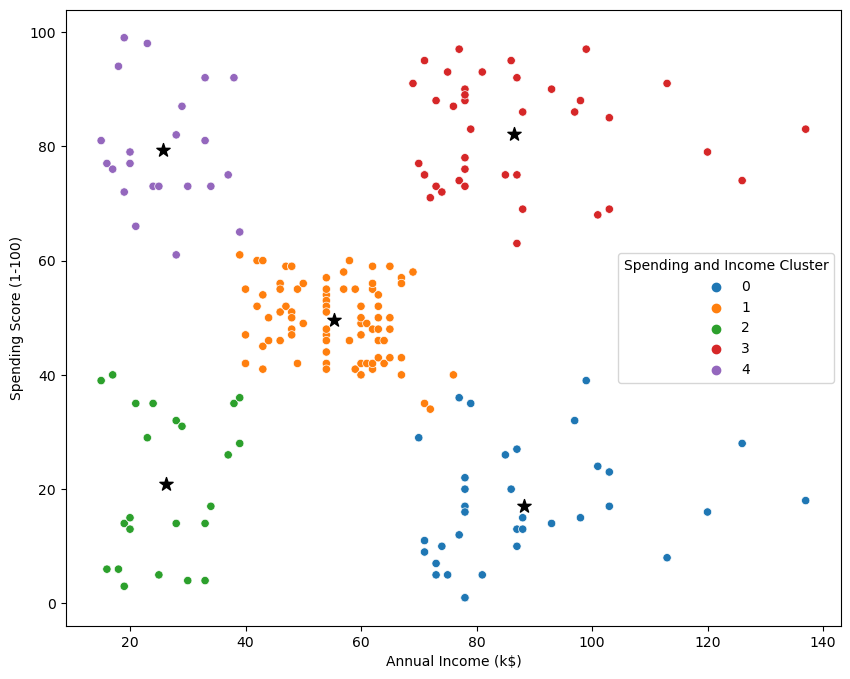

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=mall, x='Annual Income (k$)', 
                y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')

In [51]:
pd.crosstab(mall['Spending and Income Cluster'], mall['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.608696,0.391304
3,0.538462,0.461538
4,0.590909,0.409091


In [52]:
mall.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 
                               'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,45.217391,26.304348,20.913043
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636


Cluster Interpretations :
* Target group would be cluster 3 which has a high spending score and high income.
* 53% of cluster 3 shoppers are women. We should look for ways to attract these customers using marketing campaign targeting popular items in this cluster.
* Cluster 4 presents an interesting opportunity to market to the customers for sales event on popular items.